# Estructurando un Proyecto de DS (Parte II)

### Abstract

El conjunto de datos que se analiza en este estudio se centra en la reserva de hoteles y la probabilidad de que estas reservas sean canceladas. El dataset contiene información detallada sobre las reservas realizadas en distintos hoteles, incluyendo información sobre el tipo de habitación reservada, la duración de la estancia, la anticipación de la reserva, la fecha de llegada, la cantidad de personas y dias que reservan, entre otros datos.

- ¿Afecta el tipo de mercado el estado final de la reserva?

- ¿Existe relación entre el estado de la reserva y el tiempo de llegada al hotel?

- ¿Hay alguna época en particular en la que se realizan mayor cantidad de cancelaciones?

### Contexto y Problemática Comercial

#### Contexto Comercial y Analítico

El sector turístico es uno de los más importantes y dinámicos de la economía global, y los hoteles son una parte fundamental de esta industria. Los hoteles compiten en un mercado altamente competitivo, por lo que lograr realizar predicciones sobre la cancelación de las reservas realizadas pueden ayudarlos a mantenerse competitivos.

Los diferentes métodos de reserva que existen (y principalmente la reserva online) afectaron fuertemente el comportamiento de los clientes y sus posibilidades de reservas, muchas de las cuales luego son canceladas o no asistidas. Generalmente, el ofrecimiento de cancelaciones gratuitas o a un precio moderado/bajo ayuda a que los huespedes se vean beneficiados, pero conlleva a que los hoteles pierdan rentabilidad ya que para ellos esta metodología de cancelaciones es costosa.

#### Problemática


La cancelación de reservas es un problema común en la industria hotelera y puede afectar significativamente la rentabilidad del hotel. Estas cancelaciones pueden generar costos adicionales para el hotel, como la pérdida de ingresos por habitaciones no vendidas, gastos de cancelación y posibles daños a la reputación del hotel si el cliente queda insatisfecho.

Por lo tanto, es crucial para los hoteles gestionar eficazmente las cancelaciones de reservas para minimizar su impacto en la rentabilidad y la satisfacción del cliente.

Mediante este dataset se busca generar un modelo que ayude a la industria hotelera a gestionar las cancelaciones de las reservas. El dataset tiene mas de 36000 reservas analizadas y diferenciadas en canceladas y no canceladas, ademas de caracteristicas adicionales de las personas, la estadia y las reservas.

### Objetivo

El objetivo principal de este estudio es analizar la probabilidad de que las reservas de hotel sean canceladas y determinar qué factores pueden influir en esta decisión. Para lograr este objetivo, se llevaran a cabo varios análisis estadísticos y van a utilizarse diferentes técnicas de modelado predictivo que nos permitira generar un modelo de clasificación para predecir las posibilidades de que esto ocurra.

### Importación de Librerias

In [22]:
#Numpy
import numpy as np
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

### Importación de Dataset

Link al dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [2]:
hotel = pd.read_csv('./ReservaHotel.csv')

In [3]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel.shape

(36275, 19)

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Las variables del dataset son:
- Booking_ID: ID de reserva.
- no_of_adults: número de adultos.
- no_of_children: número de niños.
- no_of_weekend_nights: número de noches de fin de semana reservado.
- no_of_week_nights: número de noches de dias de semana reservado.
- type_of_meal_plan: plan de alimentación elegido.
- required_car_parking_space: si requiere estacionamiento o no.
- room_type_reserved: tipo de habitación reservada.
- lead_time: cantidad de dias en que hace la reservación.
- arrival_year: año de llegada al hotel.
- arrival_month: mes de llegada al hotel.
- arrival_date: dia de llegada al hotel.
- market_segment_type: lugar desde el que se realizo la reserva.
- repeated_guest: si la persona que reserva ya habia reservado con anterioridad.
- no_of_previous_cancellations: cantidad de cancelaciones previas.
- no_of_previous_bookings_not_canceled: cantidad de reservas previas no canceladas.
- avg_price_per_room: precio promedio por habitación.
- no_of_special_requests: cantidad de pedidos especiales.
- booking_status: estado final de la reserva.

In [6]:
# unifico las variables arrival para crear una unica variable con la fecha

from datetime import datetime

hotel['arrival'] = hotel['arrival_year'].astype(str) + '-' + hotel['arrival_month'].astype(str) + '-' + hotel['arrival_date'].astype(str)
hotel['arrival'] = pd.to_datetime(hotel['arrival'], format='%Y-%m-%d')

In [7]:
# unifico las variables de adults y children para ver el total de personas.
hotel['total_people'] = hotel['no_of_adults'] + hotel['no_of_children']

# unifico el numero de nights para ver su total
hotel['total_nights'] = hotel['no_of_weekend_nights'] + hotel['no_of_week_nights']

# unifico el numero de reservas anteriores
hotel['previous_booking'] = hotel['no_of_previous_bookings_not_canceled'] + hotel['no_of_previous_cancellations']

In [8]:
# elimino las columnas unificadas
hotel = hotel.drop(columns=['Booking_ID','no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','arrival_year','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)

In [9]:
hotel.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,arrival,total_people,total_nights,previous_booking
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,65.00,0,Not_Canceled,2017-10-02,2,3,0
1,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,Not_Canceled,2018-11-06,2,5,0
2,Meal Plan 1,0,Room_Type 1,1,Online,0,60.00,0,Canceled,2018-02-28,1,3,0
3,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,0,Canceled,2018-05-20,2,2,0
4,Not Selected,0,Room_Type 1,48,Online,0,94.50,0,Canceled,2018-04-11,2,2,0


In [10]:
hotel.shape

(36275, 13)

### Gráficos descriptivos

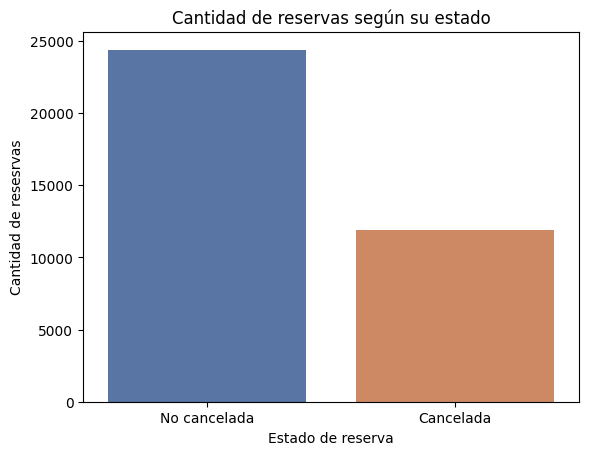

In [11]:
hs = sns.countplot(data=hotel, x= "booking_status", palette='deep')
hs.set_title('Cantidad de reservas según su estado')
labels = ('No cancelada', 'Cancelada')
hs.set_ylabel('Cantidad de resesrvas')
hs.set_xlabel('Estado de reserva')
hs.set_xticklabels(labels)
plt.show()

In [12]:
hotel['booking_status'].value_counts().mul(100)/len(hotel)

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

*De acuerdo a lo observado, las reservas NO CANCELADAS alcanzan un total aproximado de 67%, mientras que las reservas CANCELADAS son de alrededor del 33%.*

Text(0.5, 1.0, 'Lead Time vs. Status')

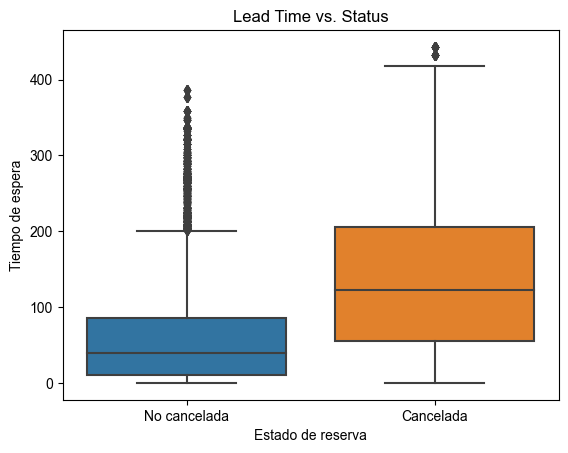

In [13]:
hl = sns.boxplot(x='booking_status', y='lead_time', data = hotel)
sns.set(font_scale=1)
hl.set_ylabel('Tiempo de espera')
hl.set_xlabel('Estado de reserva')
hl.set_xticklabels(labels)
plt.title("Lead Time vs. Status")

In [14]:
hotel['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

*En función de lo que visualizamos, podemos determinar que a mayor cantidad de dias de espera para el arribo al hotel, mayor es la tasa de cancelaciones, llegando incluso a visualizar "outliers" con valores mayores a 400 dias. Sin embargo, hay reservas con tiempos de espera menores a esa cantidad que no fueron canceladas*

In [15]:
hotel_pivot = pd.pivot_table(hotel.reset_index(),columns=['market_segment_type','type_of_meal_plan'],
                             index=['booking_status'],
                             values='index',
                             fill_value=0,
                             aggfunc=len)
hotel_pivot

market_segment_type    Aviation Complementary                          \
type_of_meal_plan   Meal Plan 1   Meal Plan 1 Meal Plan 2 Meal Plan 3   
booking_status                                                          
Canceled                     37             0           0           0   
Not_Canceled                 88           370          11           4   

market_segment_type                Corporate                           \
type_of_meal_plan   Not Selected Meal Plan 1 Meal Plan 2 Not Selected   
booking_status                                                          
Canceled                       0         213           0            7   
Not_Canceled                   6        1783           6            8   

market_segment_type     Offline                                       \
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected   
booking_status                                                         
Canceled                   2176         961           1           15   
Not_Canceled               5812        1404           0          159   

market_segment_type      Online                           
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Not Selected  
booking_status                                            
Canceled                   6253         545         1677  
Not_Canceled              11103         378         3258

In [16]:
hotel_pivot_def = hotel_pivot/len(hotel)*100
hotel_pivot_def

market_segment_type    Aviation Complementary                          \
type_of_meal_plan   Meal Plan 1   Meal Plan 1 Meal Plan 2 Meal Plan 3   
booking_status                                                          
Canceled               0.101999      0.000000    0.000000    0.000000   
Not_Canceled           0.242591      1.019986    0.030324    0.011027   

market_segment_type                Corporate                           \
type_of_meal_plan   Not Selected Meal Plan 1 Meal Plan 2 Not Selected   
booking_status                                                          
Canceled                 0.00000    0.587181     0.00000     0.019297   
Not_Canceled             0.01654    4.915231     0.01654     0.022054   

market_segment_type     Offline                                       \
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected   
booking_status                                                         
Canceled               5.998622    2.649207    0.002757     0.041351   
Not_Canceled          16.022054    3.870434    0.000000     0.438318   

market_segment_type      Online                           
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Not Selected  
booking_status                                            
Canceled              17.237767    1.502412     4.623019  
Not_Canceled          30.607857    1.042040     8.981392

*Analizando las variables de segmento de mercado de acuerdo al plan de comidas y al estado de las reservas, se puede determinar que en el segmento "Complementary", para todos sus planes de comida, no se realizan cancelaciones; si podemos observar que las mayores cancelaciones se producen para las reservas "Online" y el plan de comidas "Meal Plan 1".*

*Tambien se visualiza claramente que, para aquellas reservas que no son canceladas, el plan de comidas "Meal Plan 1" tiene una alta incidencia en dicha decisión( al igual que con las canceladas), por lo que la variable termina teniendo relevancia en nuestro análisis.*

### Cuarta Entrega

Revisión de tipos de variables

In [17]:
hotel.dtypes

type_of_meal_plan                     object
required_car_parking_space             int64
room_type_reserved                    object
lead_time                              int64
market_segment_type                   object
repeated_guest                         int64
avg_price_per_room                   float64
no_of_special_requests                 int64
booking_status                        object
arrival                       datetime64[ns]
total_people                           int64
total_nights                           int64
previous_booking                       int64
dtype: object

Armare 2 dataframes de acuerdo al tipo de variable a analizar, uno con las variables cualitativas y otra con las variables cuantitativas.

#### Variables Cuantitativas

In [19]:
hotel_cuant = hotel.select_dtypes(include = np.number)
hotel_cuant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   required_car_parking_space  36275 non-null  int64  
 1   lead_time                   36275 non-null  int64  
 2   repeated_guest              36275 non-null  int64  
 3   avg_price_per_room          36275 non-null  float64
 4   no_of_special_requests      36275 non-null  int64  
 5   total_people                36275 non-null  int64  
 6   total_nights                36275 non-null  int64  
 7   previous_booking            36275 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.2 MB


In [20]:
hotel_cuant.describe()

,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,total_people,total_nights,previous_booking
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,0.030986,85.232557,0.025637,103.423539,0.619655,1.950241,3.015024,0.176761
std,0.173281,85.930817,0.158053,35.089424,0.786236,0.650327,1.786017,1.953903
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,80.300000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,57.000000,0.000000,99.450000,0.000000,2.000000,3.000000,0.000000
75%,0.000000,126.000000,0.000000,120.000000,1.000000,2.000000,4.000000,0.000000
max,1.000000,443.000000,1.000000,540.000000,5.000000,12.000000,24.000000,64.000000


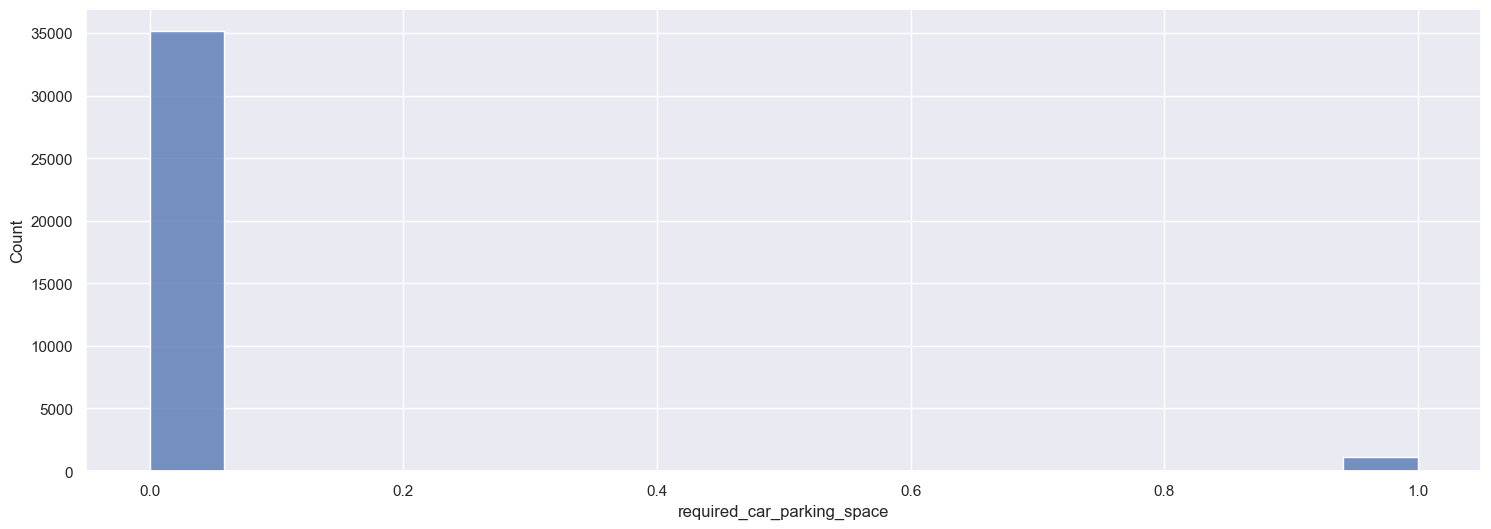

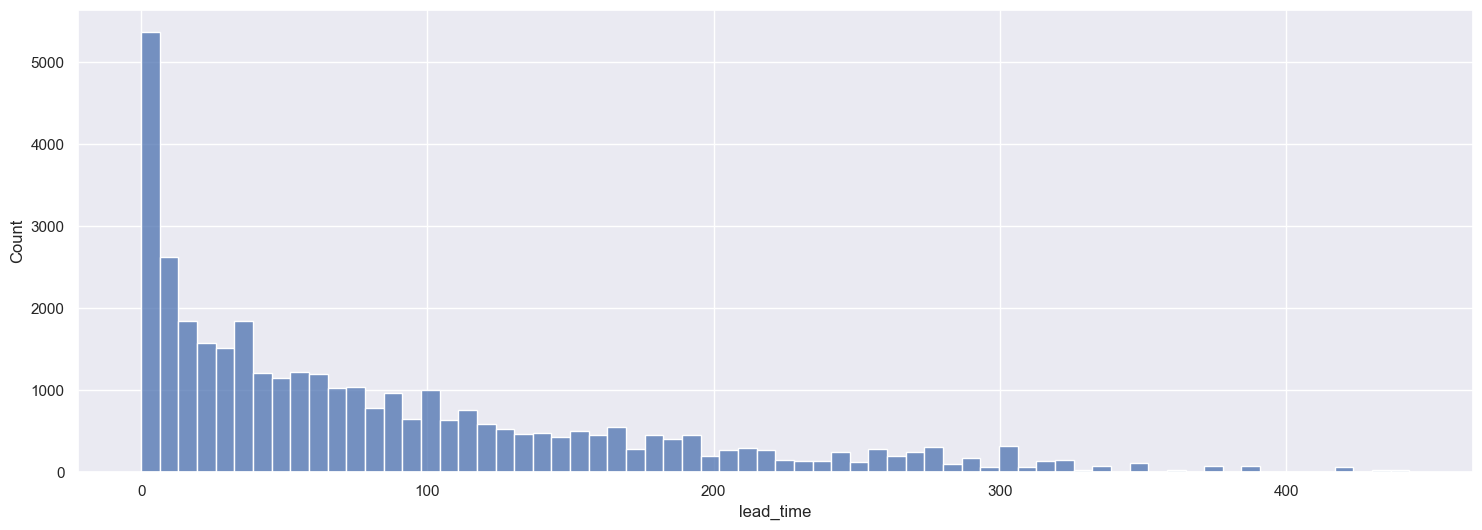

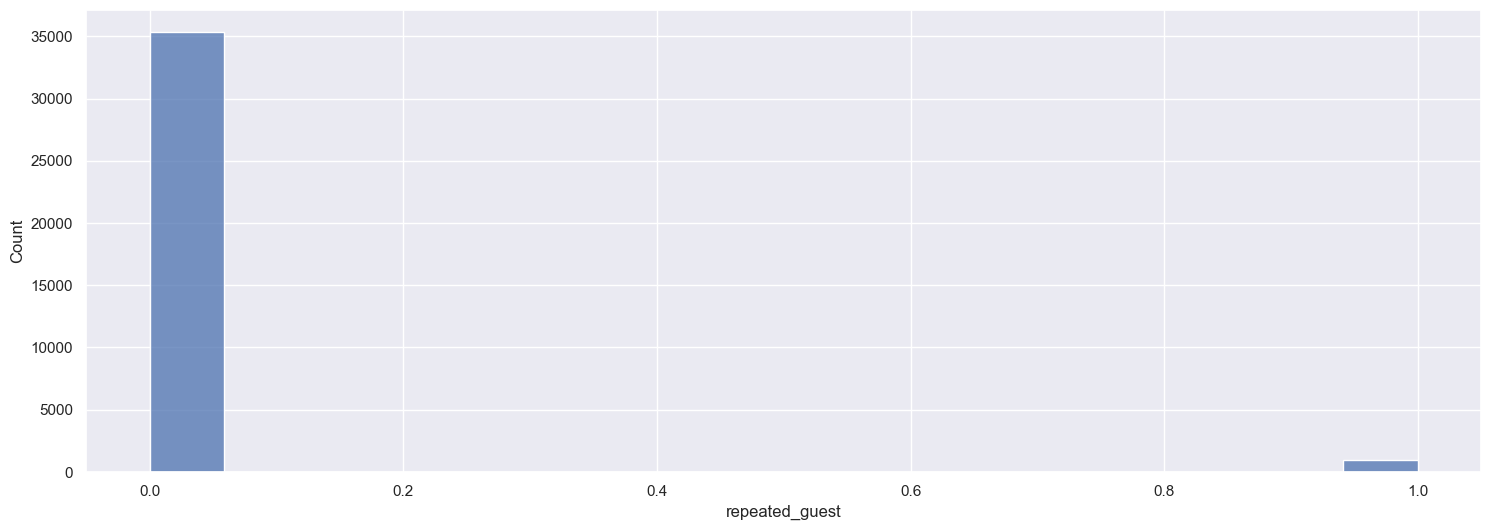

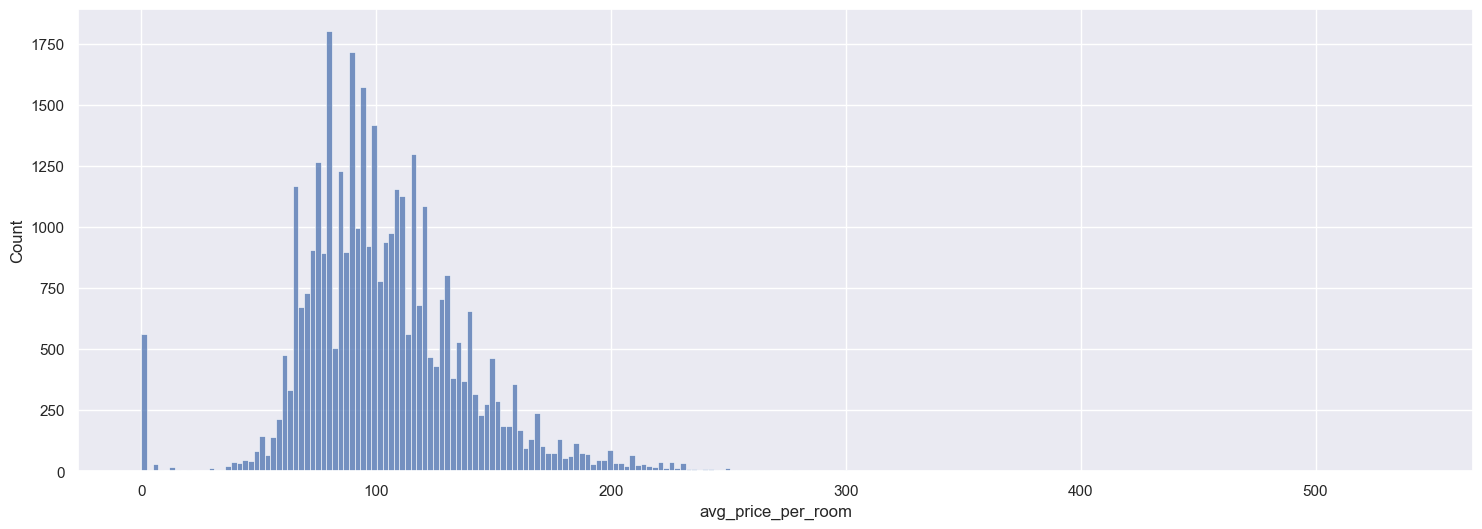

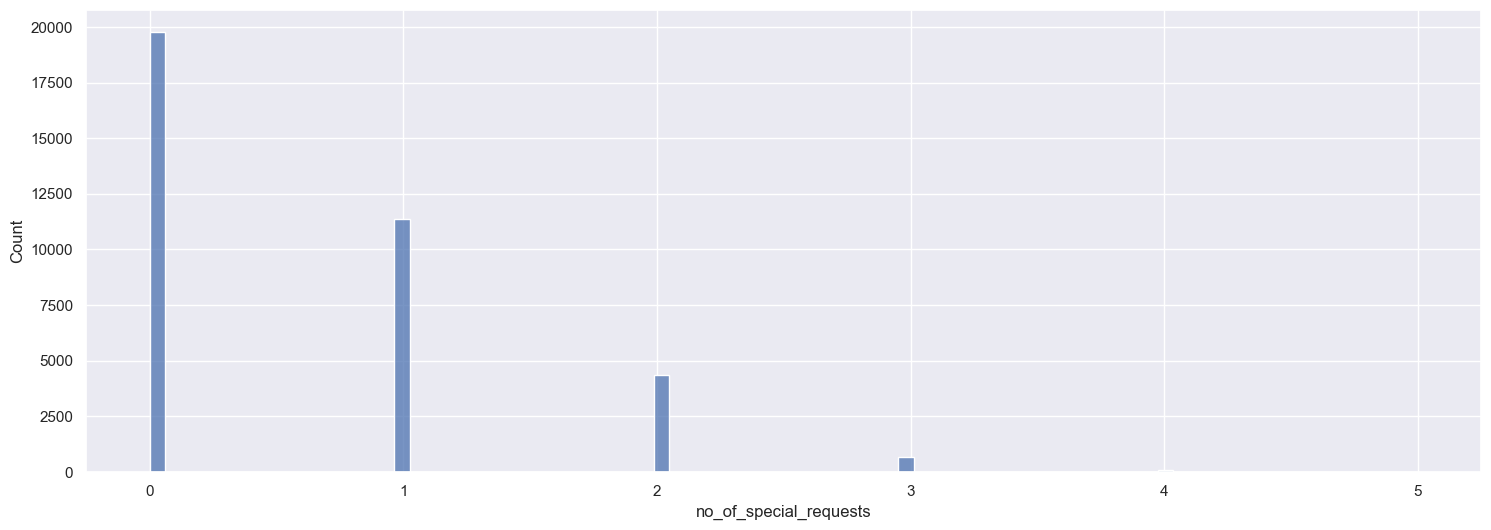

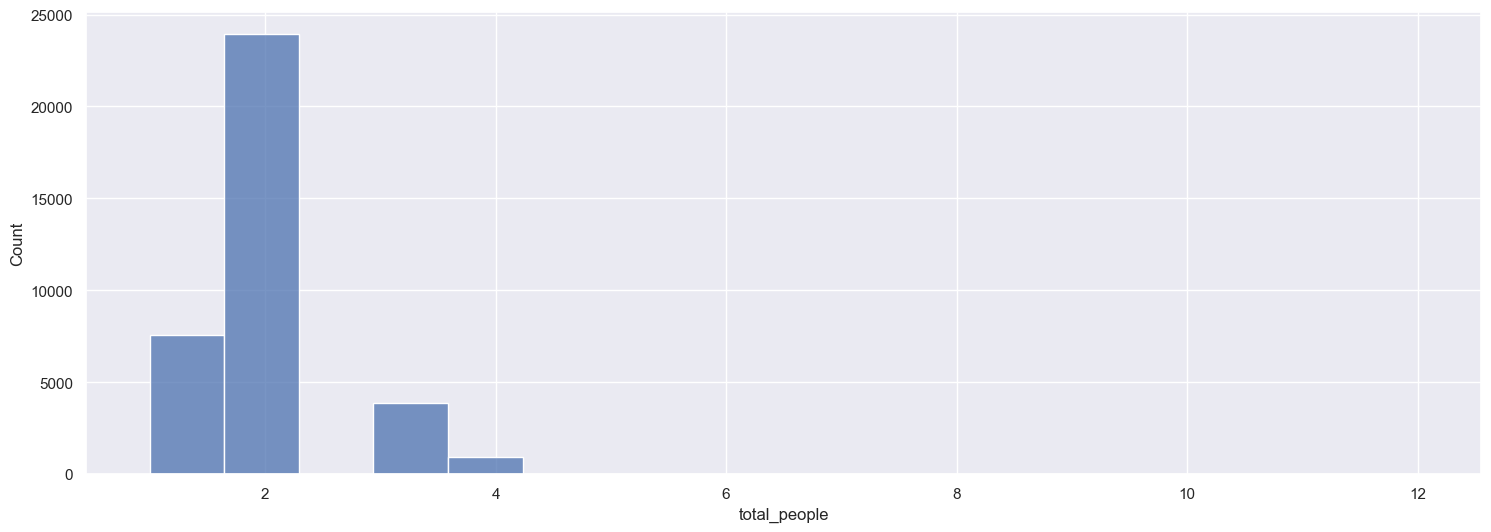

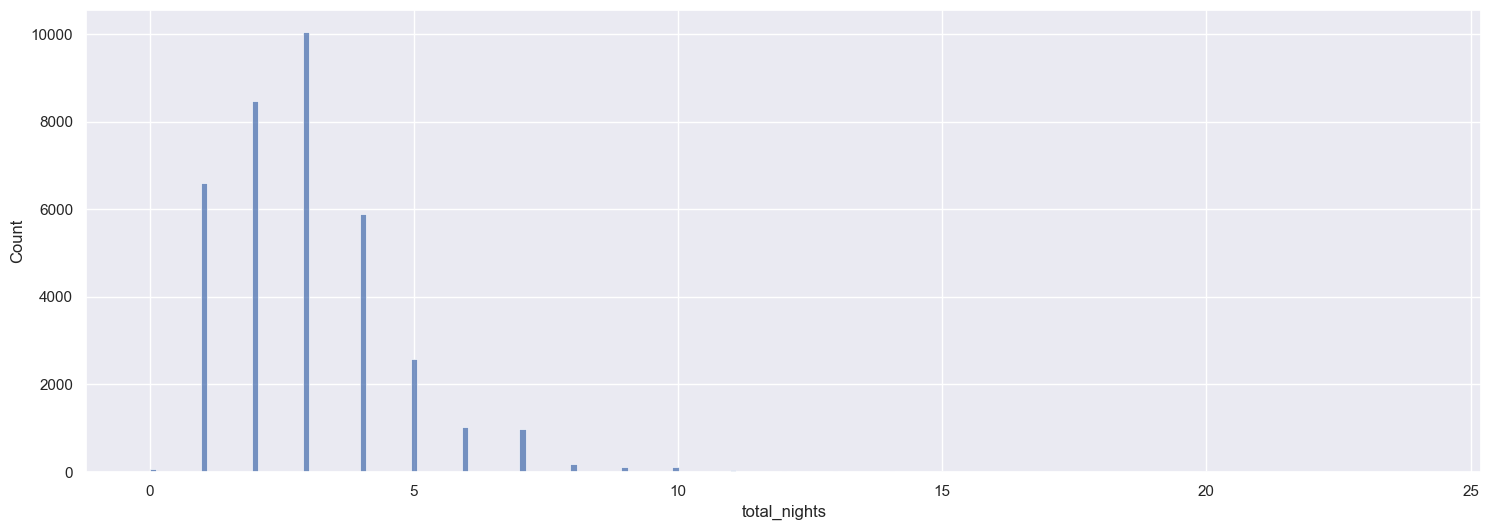

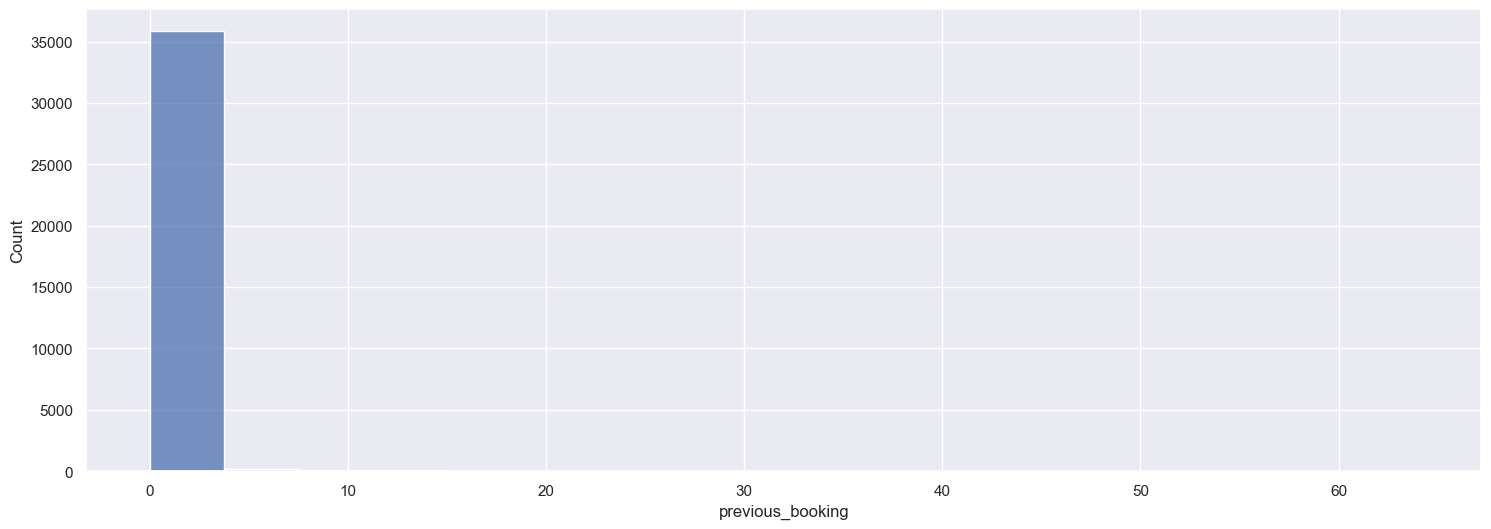

In [21]:
for i in hotel_cuant:
    plt.figure(figsize=(18, 6))
    sns.histplot(x =i, data = hotel_cuant)
    sns.set(font_scale = 1)
    plt.show() 

#### Variables Cualitativas

In [22]:
hotel_cuali = hotel.select_dtypes(include= object)
hotel_cuali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type_of_meal_plan    36275 non-null  object
 1   room_type_reserved   36275 non-null  object
 2   market_segment_type  36275 non-null  object
 3   booking_status       36275 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [23]:
for col in hotel_cuali.columns:
    print(hotel_cuali[col].unique())
    print(hotel_cuali[col].nunique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
4
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
7
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
5
['Not_Canceled' 'Canceled']
2


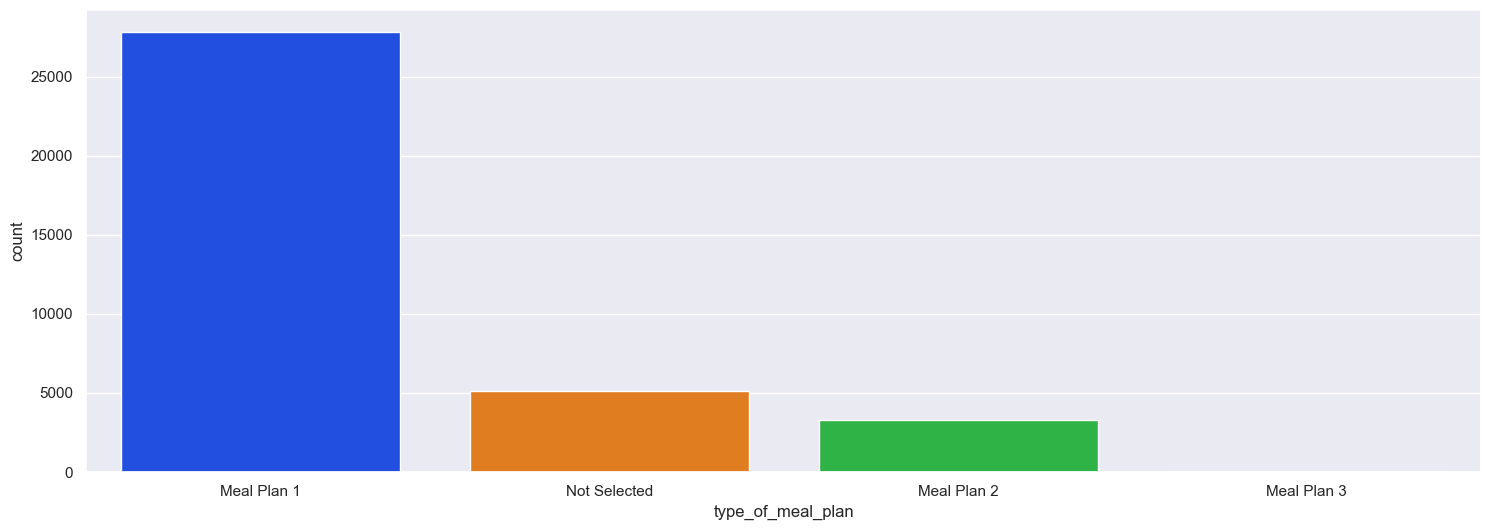

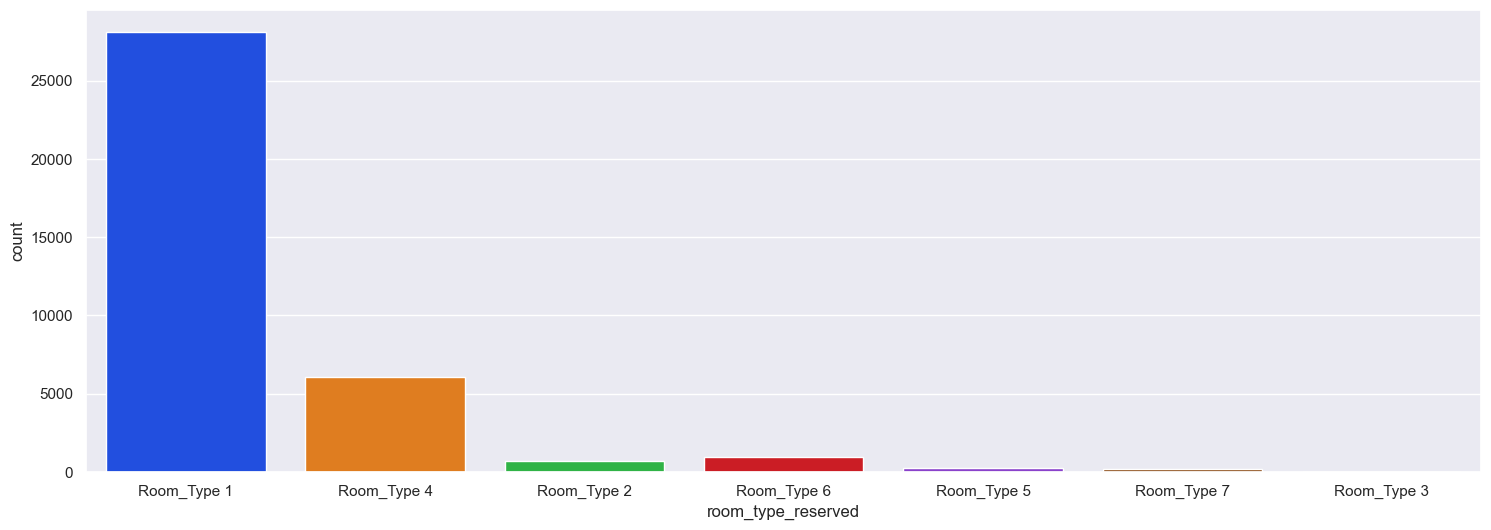

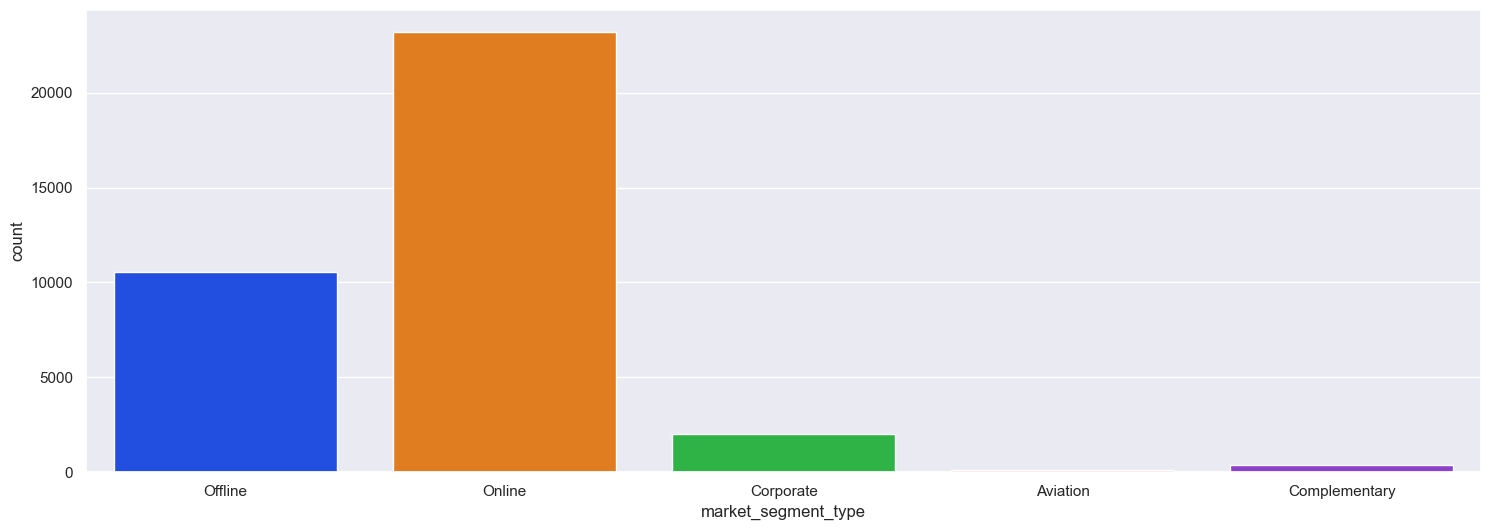

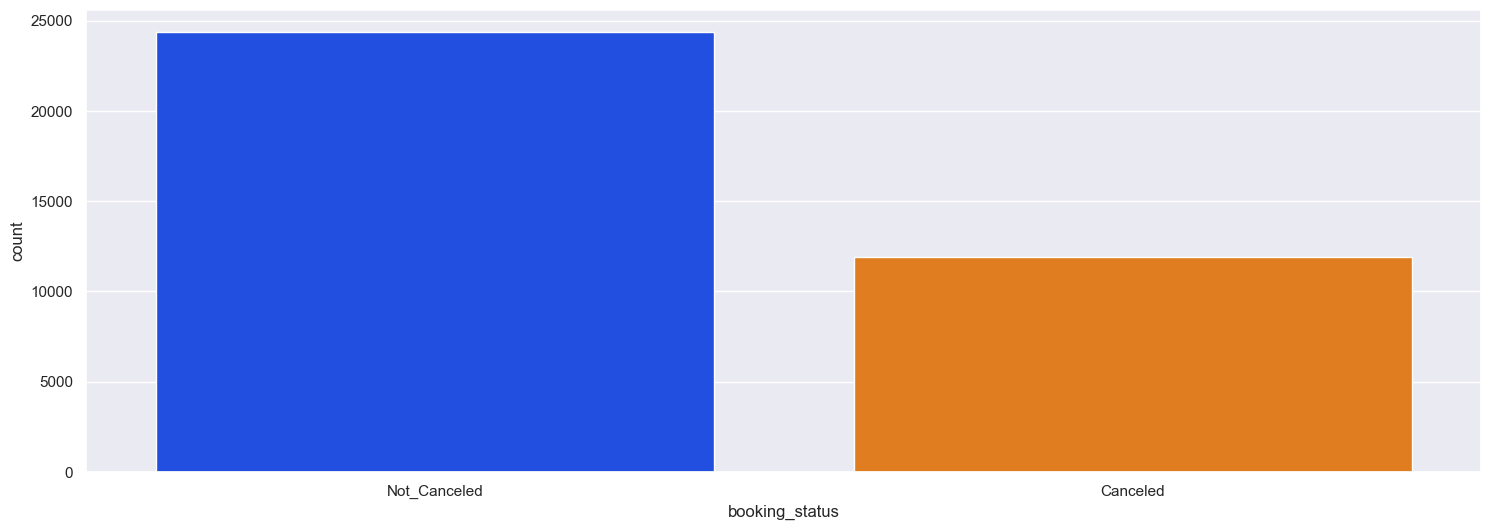

In [24]:
for i in hotel_cuali:
    plt.figure(figsize=(18, 6))
    sns.countplot(x =i, data = hotel_cuali, palette = 'bright')
    sns.set(font_scale = 1)
    plt.show()  


In [25]:
ht_meal = pd.crosstab(hotel_cuali.booking_status, hotel_cuali.type_of_meal_plan, normalize='columns')
ht_meal

type_of_meal_plan,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
booking_status,,,,
Canceled,0.311802,0.455673,0.2,0.331189
Not_Canceled,0.688198,0.544327,0.8,0.668811


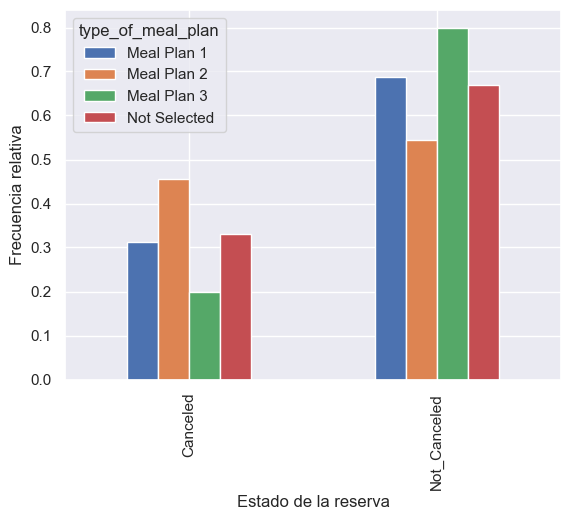

In [26]:
ht_meal.plot(kind='bar') 
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [27]:
ht_room = pd.crosstab(hotel_cuali.booking_status, hotel_cuali.room_type_reserved, normalize='columns')
ht_room

room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
booking_status,,,,,,,
Canceled,0.322503,0.32948,0.285714,0.341588,0.271698,0.42029,0.227848
Not_Canceled,0.677497,0.67052,0.714286,0.658412,0.728302,0.57971,0.772152


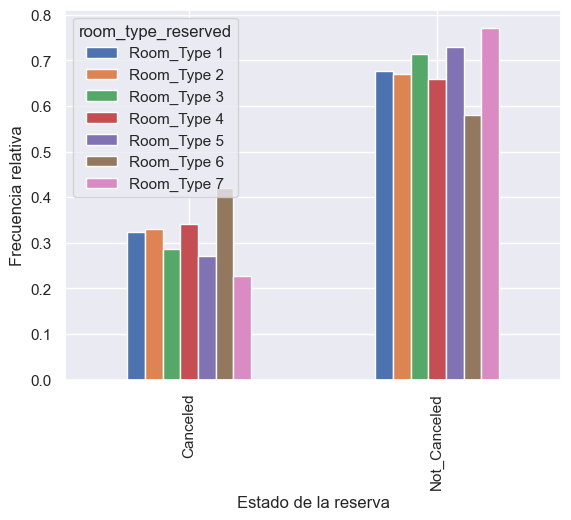

In [28]:
ht_room.plot(kind='bar') 
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [29]:
ht_segment = pd.crosstab(hotel_cuali.booking_status, hotel_cuali.market_segment_type, normalize='columns')
ht_segment

market_segment_type,Aviation,Complementary,Corporate,Offline,Online
booking_status,,,,,
Canceled,0.296,0.0,0.109073,0.299487,0.365081
Not_Canceled,0.704,1.0,0.890927,0.700513,0.634919


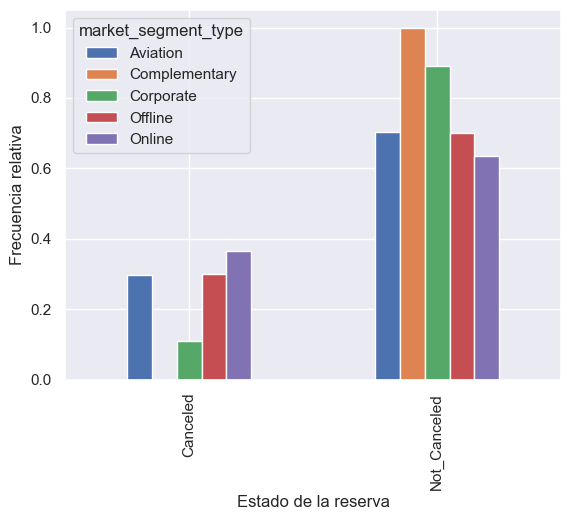

In [30]:
ht_segment.plot(kind='bar') 
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [31]:
htcancel = hotel["booking_status"]
htcancel

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [32]:
hotel_cuant["iscancel"] = htcancel
hotel_cuant.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   required_car_parking_space  36275 non-null  int64  
 1   lead_time                   36275 non-null  int64  
 2   repeated_guest              36275 non-null  int64  
 3   avg_price_per_room          36275 non-null  float64
 4   no_of_special_requests      36275 non-null  int64  
 5   total_people                36275 non-null  int64  
 6   total_nights                36275 non-null  int64  
 7   previous_booking            36275 non-null  int64  
 8   iscancel                    36275 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 2.5+ MB


In [33]:
sns.pairplot(hotel_cuant, hue='iscancel')

### Exploratory Data Analysis

- Las personas que realizaron reservas previas en el mismo hotel no registran cancelaciones.
- Se observan 2 nubes bien diferenciadas para el precio promedio de habitación (avg_price_per_room) y para el tiempo de espera (lead_time).
- Aproximadamente el 50% de las reservas que comprenden el plan 2 de comidas (type_of_meal_plan) son canceladas.
- Las reservas realizadas se mantienen para 9 de cada 10 en la categoria "Corporate" (market_segment_type)
- Se observa que la variable target sería "booking_status" para ver la cancelación de las reservas.


### Correlación de las variables

C:\Users\daru3\AppData\Local\Temp\ipykernel_25248\1125986832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hotel.corr().round(2)


<Axes: >

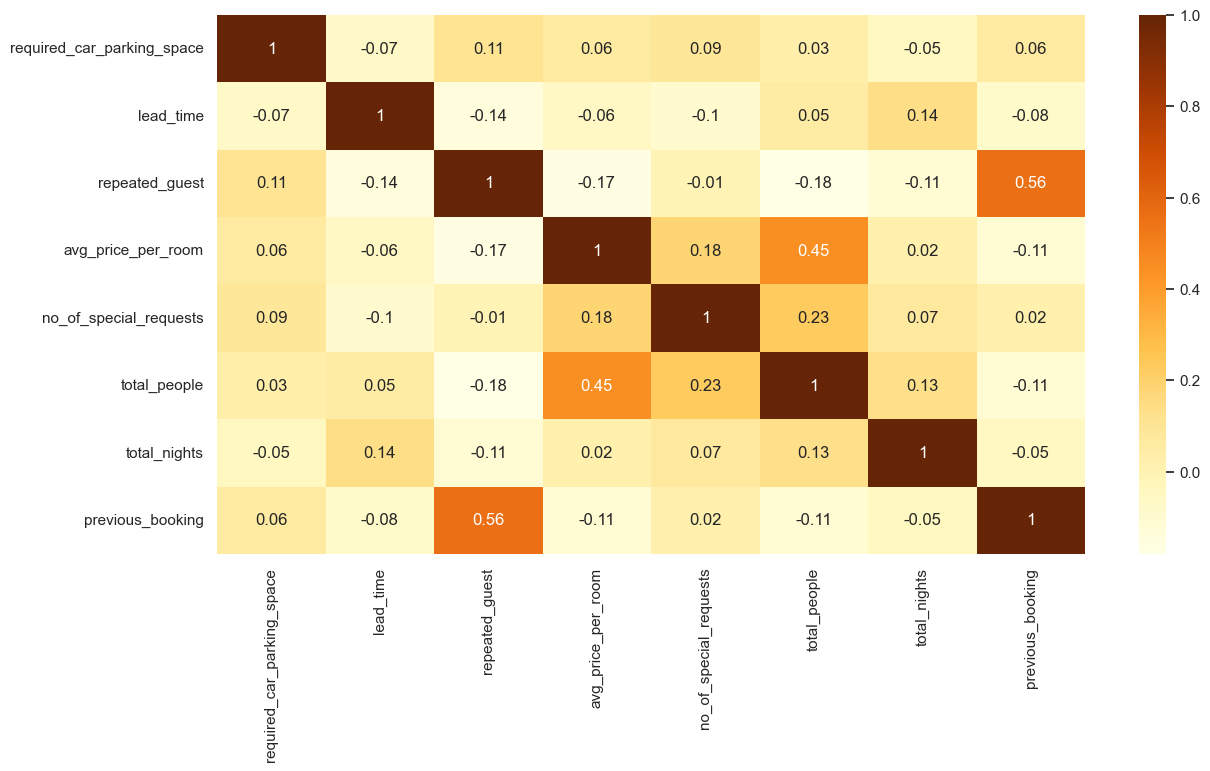

In [18]:
correlation = hotel.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

No se visualiza una correlación muy fuerte entre las variables.

### Transformación de variables categóricas a numéricas

In [23]:
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

hotel['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = label_encoder_market_segment_type.fit_transform(hotel['market_segment_type'])
hotel['booking_status'] = label_encoder_booking_status.fit_transform(hotel['booking_status'])

In [24]:
remap = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(remap)

{'Canceled': 0, 'Not_Canceled': 1}


### Feature Selection

#### Separo las variables de la variable target

In [25]:
X = hotel.drop('booking_status', axis = 1)
X = X.values
y = hotel['booking_status']
hotel.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,arrival,total_people,total_nights,previous_booking
0,0,0,0,224,3,0,65.00,0,1,2017-10-02,2,3,0
1,3,0,0,5,4,0,106.68,1,1,2018-11-06,2,5,0
2,0,0,0,1,4,0,60.00,0,0,2018-02-28,1,3,0
3,0,0,0,211,4,0,100.00,0,0,2018-05-20,2,2,0
4,3,0,0,48,4,0,94.50,0,0,2018-04-11,2,2,0


In [26]:
X

array([[0, 0, 0, ..., 2, 3, 0],
       [3, 0, 0, ..., 2, 5, 0],
       [0, 0, 0, ..., 1, 3, 0],
       ...,
       [0, 0, 0, ..., 2, 8, 0],
       [3, 0, 0, ..., 2, 3, 0],
       [0, 0, 0, ..., 2, 3, 0]], dtype=object)

In [27]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

#### Forward Selection


In [42]:
import statsmodels.api as sm

def forward_selection(hotel, target, significance_level=0.01):
    initial_features = hotel.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(hotel[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [43]:
forward_selection(X,y)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'